In [1]:
from src.models import Sequential
from src.layers import *
from src.activation_functions import *
from src.loss_functions import *

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
from tensorflow.keras.datasets.mnist import load_data as load_data_MNIST

(x_train, y_train), (x_test, y_test) = load_data_MNIST() # MNIST

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train_expanded = np.expand_dims(x_train, 1)
x_test_expanded = np.expand_dims(x_test, 1)

In [5]:
le = OneHotEncoder(sparse_output=False)

y_train_encoded = le.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = le.fit_transform(y_test.reshape(-1, 1))

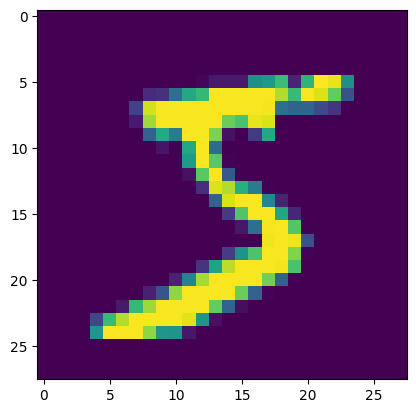

In [6]:
plt.imshow(np.einsum("chw -> hwc", x_train_expanded[0]))

In [7]:
model = Sequential(epochs=20, learning_rate=0.001, loss_function=CrossEntropy(), batch_size=32)

In [8]:
model.add(Conv2D(3, 3, 1, 1))
model.add(Activation(ReLU()))
# model.add(Conv2D(1, 3, 1, 1))
# model.add(Activation(ReLU()))
model.add(Flatten())
model.add(Linear(n_inputs=3*28*28, n_outputs=10))
model.add(Activation(Softmax()))

In [9]:
model.train(x_train_expanded[:1000], y_train_encoded[:1000])

100%|██████████| 20/20 [00:42<00:00,  2.12s/it,  Loss: 0.055022417619777074]


In [10]:
y_pred = model.predict(x_test_expanded)

Czulosc: 1.0
Swoistosc: 1.0
Accuracy: 1.0
F1 score: 0.8467714203255337
BA score: 0.8473006891480658


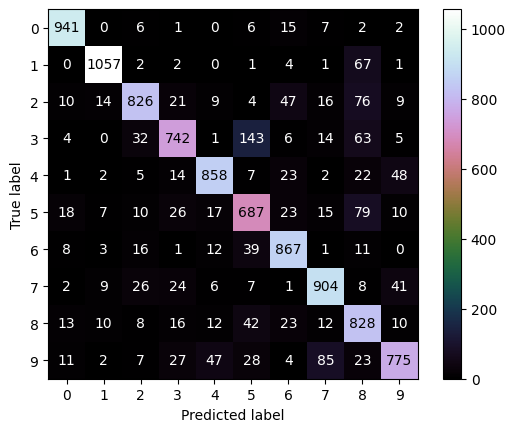

In [11]:
y_pred2 = np.argmax(y_pred, axis=1)
y_test2 = y_test

cm_model = confusion_matrix(y_test2, y_pred2)

tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

# fpr, tpr, roc_auc = roc_curve(y_test, y_pred)
#
# rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
# rok_model.plot()

print("Czulosc:", tp_model / (tp_model + fn_model))
print("Swoistosc:", tn_model / (tn_model + fp_model))
print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

# print("ROC auc:", roc_auc_score(y_test, y_pred))
print("F1 score:", f1_score(y_test2, y_pred2, average='macro'))
print("BA score:", balanced_accuracy_score(y_test2, y_pred2))

In [12]:
# the_image = np.asarray([[[
#     [1, 1, 1, 0, 0],
#     [0, 1, 1, 1, 0],
#     [0, 0, 1, 1, 1],
#     [0, 0, 1, 1, 0],
#     [0, 1, 1, 0, 0]
# ]]])

the_image = np.asarray([[[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]],[[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]],
[[
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]]])

In [13]:
the_image.shape

(3, 1, 3, 3)

In [14]:
the_image2 = np.repeat(the_image[0][np.newaxis, :, :, :], 6, axis=0)
the_image2.shape

(6, 1, 3, 3)

In [15]:
batch = 3
channels = 1
height = 10
width = 10
the_image = np.random.random((batch, channels, height, width)).astype(np.float32)
the_image

array([[[[9.18003500e-01, 7.89599866e-02, 9.85845923e-01,
          4.61039305e-01, 9.32361364e-01, 6.15024529e-02,
          2.98033595e-01, 6.27079725e-01, 4.87688124e-01,
          9.18664575e-01],
         [8.25864375e-01, 5.47050297e-01, 3.15423340e-01,
          4.58125412e-01, 5.81247248e-02, 3.40778351e-01,
          5.55127263e-01, 1.25151202e-01, 6.84333861e-01,
          3.28983277e-01],
         [3.30400914e-01, 6.14666231e-02, 1.58388302e-01,
          7.03223348e-01, 1.42294452e-01, 9.72830951e-01,
          2.98358619e-01, 4.82138366e-01, 9.53712106e-01,
          1.41821146e-01],
         [7.07340598e-01, 8.34468544e-01, 4.25925583e-01,
          4.07361239e-01, 8.95349503e-01, 5.08962810e-01,
          8.95027816e-01, 3.38737145e-02, 1.33532941e-01,
          2.92137474e-01],
         [6.98418319e-01, 5.12799799e-01, 1.73325781e-04,
          8.64711940e-01, 4.99464780e-01, 3.77223760e-01,
          7.18744874e-01, 9.77163851e-01, 5.55281937e-01,
          3.26331168e-

In [16]:
my_conv = Conv2D(
    n_filters=1,
    filter_size=3,
    stride=1,
    padding=1
)

In [17]:
my_conv.weights = np.asarray([[[-1, -2, -1],
                               [0, 0, 0],
                               [1, 2, 1]]])

In [18]:
my_conv.weights.shape

(1, 3, 3)

In [19]:
my_conv.forward(the_image)

array([[[[ 2.19877905e+00,  2.23538831e+00,  1.63602239e+00,
           1.28979889e+00,  9.15153213e-01,  1.29480869e+00,
           1.57618408e+00,  1.48976353e+00,  1.82280220e+00,
           1.34230042e+00],
         [-1.19269853e+00, -1.45004693e+00, -1.43022456e+00,
          -1.13315645e+00, -4.26621284e-01,  1.03291511e+00,
           7.67037187e-01,  1.76466286e-01,  1.02631748e-02,
          -1.08766288e+00],
         [ 5.03706932e-02,  5.66814959e-01,  4.57658559e-01,
           8.46198674e-01,  1.79186984e+00,  1.51349425e+00,
           7.56708078e-01, -3.93455341e-01, -1.22972513e+00,
          -6.24492526e-01],
         [ 1.18736799e+00,  1.11246878e+00,  2.96391817e-01,
           5.21932538e-01,  2.80222058e-01, -4.13657799e-01,
           7.40190804e-01,  1.01200706e+00, -1.17324829e-01,
          -2.94101238e-02],
         [-8.62953454e-01, -5.54520816e-01,  1.07062113e+00,
           1.40099224e+00,  1.68896601e-01, -8.06983918e-01,
          -4.27590422e-01,  5.6364

In [20]:
my_conv.forward(the_image2).shape

(6, 1, 3, 3)

In [21]:
my_conv.forward(the_image)

array([[[[ 2.19877905e+00,  2.23538831e+00,  1.63602239e+00,
           1.28979889e+00,  9.15153213e-01,  1.29480869e+00,
           1.57618408e+00,  1.48976353e+00,  1.82280220e+00,
           1.34230042e+00],
         [-1.19269853e+00, -1.45004693e+00, -1.43022456e+00,
          -1.13315645e+00, -4.26621284e-01,  1.03291511e+00,
           7.67037187e-01,  1.76466286e-01,  1.02631748e-02,
          -1.08766288e+00],
         [ 5.03706932e-02,  5.66814959e-01,  4.57658559e-01,
           8.46198674e-01,  1.79186984e+00,  1.51349425e+00,
           7.56708078e-01, -3.93455341e-01, -1.22972513e+00,
          -6.24492526e-01],
         [ 1.18736799e+00,  1.11246878e+00,  2.96391817e-01,
           5.21932538e-01,  2.80222058e-01, -4.13657799e-01,
           7.40190804e-01,  1.01200706e+00, -1.17324829e-01,
          -2.94101238e-02],
         [-8.62953454e-01, -5.54520816e-01,  1.07062113e+00,
           1.40099224e+00,  1.68896601e-01, -8.06983918e-01,
          -4.27590422e-01,  5.6364

In [22]:
import tensorflow as tf

In [23]:
random_array2 = np.einsum("bchw -> bhwc", the_image)
random_array2.shape

(3, 10, 10, 1)

In [24]:
filtr = np.asarray([[[[-1]],

        [[-2]],

        [[-1]]],


       [[[0]],

        [[0]],

        [[0]]],


       [[[1]],

        [[2]],

        [[1]]]])

In [25]:
# random_array = np.random.random((1, 3, 10, 10))
# random_array2 = np.einsum("bchw -> bhwc", the_image)

tf_conv2d = tf.nn.conv2d_transpose(
    input=random_array2,
    output_shape=(3, 3, 3, 1),
    filters=filtr,
    padding='SAME',
    data_format='NHWC',
    strides=1
)

print(tf_conv2d)

InvalidArgumentError: {{function_node __wrapped__Conv2DBackpropInput_device_/job:localhost/replica:0/task:0/device:CPU:0}} Conv2DCustomBackpropInput: Size of out_backprop doesn't match computed: actual = 10, computed = 3 spatial_dim: 1 input: 3 filter: 3 output: 10 stride: 1 dilation: 1 [Op:Conv2DBackpropInput]

In [ ]:
np.einsum("bhwc -> bchw", tf_conv2d)

In [ ]:
np.random.random((3, 3, 3, 1)).shape

In [ ]:

conv = Conv2D(1, 3, 1, 1)

In [ ]:
conv.weights

In [ ]:
# conv.forward(random_array).shape

In [ ]:
batch = np.random.randint(1, 100)
channels = 1
height = np.random.randint(10, 100)
width = height
the_image = np.random.random((batch, channels, height, width)).astype(np.float32)

print(the_image.shape)

filter_size = np.random.randint(1, 10)
filter_weights = np.random.random((
    filter_size,
    filter_size
))

my_conv = Conv2D(
    n_filters=1,
    filter_size=filter_size,
    stride=1,
    padding=0
)

my_conv.weights = np.expand_dims(filter_weights, 0).astype(np.float32)

print(my_conv.weights.shape)
print(np.expand_dims(filter_weights, (2, 3)).shape)

tf_conv2d = tf.nn.conv2d(
    input=np.einsum("bchw -> bhwc", the_image),
    filters=np.expand_dims(filter_weights, (2, 3)),
    padding='VALID',
    data_format='NHWC',
    strides=1
)
print(my_conv.forward(the_image).shape)
assert np.isclose(
    my_conv.forward(the_image),
    np.einsum("NHWC->NCHW", tf_conv2d)
).all()